In [1]:
import tensorflow as tf

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Loading the MNIST dataset in Keras

# It is a fashion dataset

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
print(len(train_images))
print(len(test_images))

60000
10000


In [5]:
print(len(train_labels))
print(len(test_labels))

60000
10000


Label 6


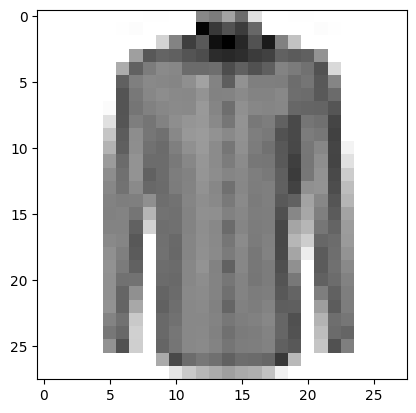

(28, 28)
2


In [7]:
i = 3000
digit = train_images[i]
label = train_labels[i]



print("Label",label)
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()


print(digit.shape)
print(digit.ndim)

In [8]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


Label 9


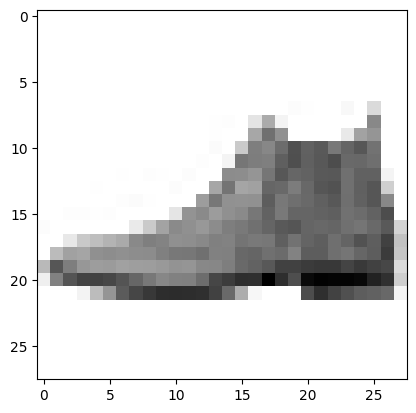

(28, 28)
2


In [9]:
i = 0
digit = test_images[i]
label = test_labels[i]


import matplotlib.pyplot as plt

print("Label",label)
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()


print(digit.shape)
print(digit.ndim)

In [10]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [15]:
test_labels[1]

2

In [11]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [16]:
train_labels[1]

0

# The network architecture

In [12]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()

network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [17]:
(28*28,)

(784,)

In [18]:
digit.shape

(28, 28)

In [19]:
digit.reshape((28*28)).shape

(784,)

# The compilation step

In [20]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Normalization

In [21]:
# X = Sample
train_images = train_images.reshape((60000, 28 * 28)) # Reshape
train_images = train_images.astype('float32') / 255 # Normalize

test_images = test_images.reshape((10000, 28 * 28)) # Reshape
test_images = test_images.astype('float32') / 255 # Normalize

# One Hot Encoding

In [22]:
# Label = Class
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [23]:
train_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
train_labels[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [25]:
test_labels[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Training Model

In [26]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 7s 4ms/step - loss: 0.5626 - accuracy: 0.8021
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.3864 - accuracy: 0.8582
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3416 - accuracy: 0.8738
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3131 - accuracy: 0.8841
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2951 - accuracy: 0.8911


# Testing Model

In [27]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3422 - accuracy: 0.8784
test_acc: 0.8784000277519226


In [28]:
print('test_loss',test_loss)

test_loss 0.34219545125961304


# Predicting

In [29]:
network.predict(test_images)

313/313 [==============================] - 1s 2ms/step


array([[1.2340960e-06, 3.7362537e-07, 1.7750115e-06, ..., 3.6087509e-02,
        2.2430952e-04, 9.5605147e-01],
       [2.2688566e-06, 2.2051590e-11, 9.9837565e-01, ..., 5.3777573e-11,
        3.0739195e-10, 7.5736771e-11],
       [2.6559302e-08, 1.0000000e+00, 5.4349941e-10, ..., 1.6322895e-13,
        2.2039987e-12, 7.6179704e-15],
       ...,
       [9.7846378e-06, 4.6743460e-11, 6.8846548e-06, ..., 9.8770931e-07,
        9.9995959e-01, 6.0093941e-10],
       [6.1750633e-08, 9.9995518e-01, 7.2195874e-08, ..., 1.0372631e-08,
        2.5279734e-09, 1.7720154e-08],
       [9.6066869e-05, 1.4853203e-05, 3.4017596e-04, ..., 1.6683137e-02,
        8.8885380e-03, 3.0436262e-04]], dtype=float32)